In [1]:
import pandas as pd
import numpy as np
from pykrx import stock
import matplotlib.pyplot as plt
import random

In [2]:
kospi_200 = stock.get_index_portfolio_deposit_file("1028")

df = pd.DataFrame(columns=['시가', '고가', '저가', '종가', '거래량', '종목명', '종목코드'])
for i in kospi_200:
    tmp_df = stock.get_market_ohlcv_by_date("20200101", "20210101", i, "y")
    name = stock.get_market_ticker_name(i)
    tmp_df['종목명'] = name
    tmp_df['종목코드'] = i
    df = df.append(tmp_df)

sorted_df = df.sort_values(by=['거래량'], axis=0, ascending = False)
code_df = sorted_df.iloc[:30, 6]

def volume_ret_df(date_1, date_2):
    code_list = []
    name_list = []
    f_list = []
    o_list = []
    p_list = []

    for i in range(len(code_df)):
        code_tmp = code_df[i]
        name_tmp = stock.get_market_ticker_name(code_tmp)
        volume_df = stock.get_market_trading_volume_by_date(date_1, date_2, code_tmp)
        code_list.append(code_tmp)
        name_list.append(name_tmp)
        f_list.append(volume_df['외국인합계'])
        o_list.append(volume_df['기관합계'])
        p_list.append(volume_df['개인'])

    result_df = pd.DataFrame(columns=['종목코드', '종목명', '외국인거래량', '기관거래량', '개인거래량'])
    result_df['종목코드'] = code_list
    result_df['종목명'] = name_list
    result_df['외국인거래량'] = f_list
    result_df['기관거래량'] = o_list
    result_df['개인거래량'] = p_list

    return result_df

a_df = volume_ret_df("20150101", "20200131")
a_df

,종목코드,종목명,외국인거래량,기관거래량,개인거래량
0,005930,삼성전자,날짜 2015-01-02 21466 2015-01-05 -53048...,날짜 2015-01-02 -20583 2015-01-05 9399...,날짜 2015-01-02 -5925 2015-01-05 -3200...
1,008350,남선알미늄,날짜 2015-01-02 -4615 2015-01-05 211458 2...,날짜 2015-01-02 8100 2015-01-05 -17775 201...,날짜 2015-01-02 67327 2015-01-05 -199683 2...
2,010140,삼성중공업,날짜 2015-01-02 10534 2015-01-05 53714 2...,날짜 2015-01-02 -34509 2015-01-05 -224787 2...,날짜 2015-01-02 39317 2015-01-05 177008 2...
3,042670,두산인프라코어,날짜 2015-01-02 -98591 2015-01-05 -201553 2...,날짜 2015-01-02 182338 2015-01-05 155875 2...,날짜 2015-01-02 -83015 2015-01-05 48280 2...
4,019170,신풍제약,날짜 2015-01-02 691 2015-01-05 -970 2...,날짜 2015-01-02 -819 2015-01-05 0 201...,날짜 2015-01-02 -17 2015-01-05 960 2...
5,088350,한화생명,날짜 2015-01-02 -114053 2015-01-05 304377...,날짜 2015-01-02 26350 2015-01-05 -312286 2...,날짜 2015-01-02 87703 2015-01-05 10208 2...
6,020560,아시아나항공,날짜 2015-01-02 -568674 2015-01-05 -170885 2...,날짜 2015-01-02 -8316 2015-01-05 367730 2...,날짜 2015-01-02 540549 2015-01-05 -233352 2...
7,034020,두산중공업,날짜 2015-01-02 60877 2015-01-05 64321 2...,날짜 2015-01-02 -155358 2015-01-05 -105723 2...,날짜 2015-01-02 95389 2015-01-05 41629 2...
8,003520,영진약품,날짜 2015-01-02 -33623 2015-01-05 33866 2...,날짜 2015-01-02 -67569 2015-01-05 -9623 2...,날짜 2015-01-02 101192 2015-01-05 -24243 2...
9,011200,HMM,날짜 2015-01-02 -87696 2015-01-05 34418 2...,날짜 2015-01-02 52591 2015-01-05 220340 2...,날짜 2015-01-02 50056 2015-01-05 -237164 2...


<ipython-input-3-74898043a74b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_df['총외국인거래량'][i] = b_df['종가'][i]*b_df['외국인거래량'][i]
                   날짜   외국인거래량     종가        총외국인거래량
날짜                                                  
2015-01-02 2015-01-02    21466  26799      575267334
2015-01-05 2015-01-05   -53048  26720    -1417442560
2015-01-06 2015-01-06  -102252  26300    -2689227600
2015-01-07 2015-01-07   -60081  25880    -1554896280
2015-01-08 2015-01-08    -4352  26780     -116546560
...               ...      ...    ...            ...
2020-01-23 2020-01-23 -2223737  61800  -137426946600
2020-01-28 2020-01-28 -5300754  59400  -314864787600
2020-01-29 2020-01-29   473721  59100    27996911100
2020-01-30 2020-01-30 -3646798  58800  -214431722400
2020-01-31 2020-01-31 -3776715  57800  -2182

C:\Users\82102\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\82102\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82102\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


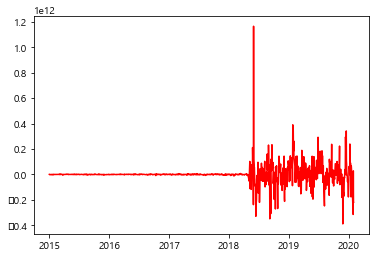

In [3]:
b_df = pd.DataFrame(columns=['날짜','외국인거래량','종가','총외국인거래량'])
b_df['외국인거래량'] = a_df['외국인거래량'][0]
b_df['종가'] = stock.get_market_ohlcv_by_date("20150101","20200131",a_df['종목코드'][0])
for i in range(len(b_df)):
    b_df['총외국인거래량'][i] = b_df['종가'][i]*b_df['외국인거래량'][i]
b_df['날짜'] = b_df.index
print(b_df)
plt.plot(b_df['날짜'], b_df['총외국인거래량'], c = 'r', label = '외국인')

In [4]:
class Preprocessor:

    def normalize(arr):
        #     sign = np.sign(arr)
        #     arr = np.log(np.abs(arr)+1)*sign
        return (arr-np.mean(arr))/np.std(arr)
    
    def minmax(arr):
        return((arr-np.min(arr))/(np.max(arr)-np.min(arr)))

C:\Users\82102\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\82102\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82102\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


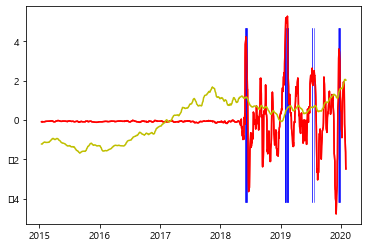

In [5]:
ppsr = Preprocessor
b_df['10일이동평균'] = b_df['총외국인거래량'].rolling(window=10).mean()
b_df['정규화'] = ppsr.normalize(b_df['10일이동평균'])
plt.plot(b_df.index, b_df['정규화'], c = 'r', label = '외국인')

for i in range(len(b_df)):
    if b_df['정규화'][i]>2.5:
        plt.axvline(x=b_df['날짜'][i], color='b', linestyle='-', linewidth=0.5, ymin=0.1, ymax=0.9)
        
b_df['종가의10일이동평균'] = b_df['종가'].rolling(window=10).mean()
b_df['종가의정규화'] = ppsr.normalize(b_df['종가의10일이동평균'])

plt.plot(b_df.index, b_df['정규화'], c = 'r', label = '외국인')        
plt.plot(b_df['날짜'], b_df['종가의정규화'], c = 'y', label = '외국인')
plt.show()

In [6]:
def makebdf(a_df,j):
    b_df = pd.DataFrame(columns=['날짜','외국인거래량','종가','총외국인거래량'])
    b_df['외국인거래량'] = a_df['외국인거래량'][j]
    b_df['종가'] = stock.get_market_ohlcv_by_date("20150101","20200131",a_df['종목코드'][j])

    for i in range(len(b_df)):
        b_df['총외국인거래량'][i] = b_df['종가'][i]*b_df['외국인거래량'][i]
    b_df['날짜'] = b_df.index
    b_df['10일이동평균'] = b_df['총외국인거래량'].rolling(window=10).mean()
    b_df['정규화'] = ppsr.normalize(b_df['10일이동평균'])

    b_df['종가의10일이동평균'] = b_df['종가'].rolling(window=10).mean()
    b_df['종가의정규화'] = ppsr.normalize(b_df['종가의10일이동평균'])
    return b_df

def howmuch(b_df,day):
    Idx = day
    IdxLater = Idx+30
    if IdxLater<=len(b_df):
        return 1 - b_df['종가'][IdxLater]/b_df['종가'][Idx]

In [7]:
result = np.array([])
resultRandom = np.array([])

for j in range(30):
    b_df = makebdf(a_df,j)
    for i in range(len(b_df)):
        if b_df['정규화'][i]>2.5:
            if i+30<len(b_df):
                result = np.append(result,howmuch(b_df,i))
                k = random.randrange(0,len(b_df)-30)
                resultRandom = np.append(resultRandom,howmuch(b_df,k))

<ipython-input-6-a170f1c7809c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_df['총외국인거래량'][i] = b_df['종가'][i]*b_df['외국인거래량'][i]


In [9]:
print(len(result))
print(len(resultRandom))

564
564


(array([  4.,   5.,   3.,  11.,  64., 189., 208.,  58.,  12.,  10.]),
 array([-0.53780069, -0.44093932, -0.34407795, -0.24721658, -0.15035522,
        -0.05349385,  0.04336752,  0.14022889,  0.23709026,  0.33395163,
         0.43081299]),
 <BarContainer object of 10 artists>)

C:\Users\82102\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\82102\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82102\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


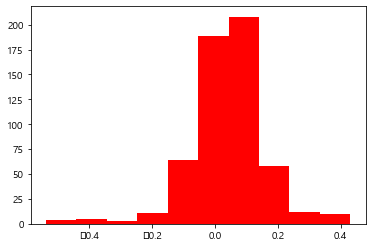

In [10]:
plt.hist(result,color = 'r')

(array([  5.,   8.,  17.,  57., 155., 215.,  75.,  28.,   2.,   2.]),
 array([-0.50604839, -0.4074405 , -0.30883262, -0.21022473, -0.11161685,
        -0.01300896,  0.08559892,  0.18420681,  0.28281469,  0.38142258,
         0.48003046]),
 <BarContainer object of 10 artists>)

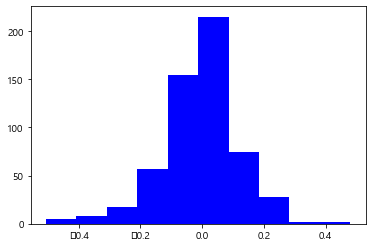

In [11]:
plt.hist(resultRandom,color = 'b')

In [12]:
print(np.mean(result)) #외국인의 순매수량이 급증했을 때 30영업일 후 종가가 평균적으로 약 4% 증가
print(np.mean(resultRandom))

0.0400733515104732
-0.0023503282616078995


In [13]:
result2 = np.array([])
resultRandom2 = np.array([])

for j in range(30):
    b_df = makebdf(a_df,j)
    for i in range(len(b_df)):
        if b_df['정규화'][i]<-2.5:
            if i+30<len(b_df):
                result2 = np.append(result2,howmuch(b_df,i))
                k = random.randrange(0,len(b_df)-30)
                resultRandom2 = np.append(resultRandom2,howmuch(b_df,k))

<ipython-input-6-a170f1c7809c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_df['총외국인거래량'][i] = b_df['종가'][i]*b_df['외국인거래량'][i]


In [14]:
print(len(result2))
print(len(resultRandom2))

409
409


(array([  5.,  12.,  22.,  68., 127.,  88.,  46.,  19.,  13.,   9.]),
 array([-0.37516689, -0.2920761 , -0.20898532, -0.12589453, -0.04280375,
         0.04028704,  0.12337782,  0.20646861,  0.28955939,  0.37265018,
         0.45574096]),
 <BarContainer object of 10 artists>)

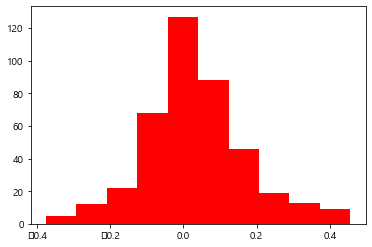

In [15]:
plt.hist(result2,color = 'r')

(array([  1.,   2.,   2.,   7.,  42., 129., 176.,  46.,   3.,   1.]),
 array([-0.7756772 , -0.64794449, -0.52021178, -0.39247907, -0.26474635,
        -0.13701364, -0.00928093,  0.11845178,  0.24618449,  0.37391721,
         0.50164992]),
 <BarContainer object of 10 artists>)

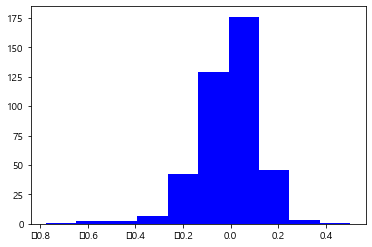

In [16]:
plt.hist(resultRandom2,color = 'b')

In [17]:
print(np.mean(result2)) #기관의 순매도량이 급증했을 때 30 영업일 후 종가가 평균적으로 약 3.252% 증가
print(np.mean(resultRandom2))

0.03252021727934463
-0.007585368292385089


In [ ]:
#이 경우 한 종목에 대해서는 외국인의 순매수/순매도가 급증했을 때의 횟수와 랜덤 횟수를 같게 하였음
#즉, 만약 위 데이터에서 삼성전자에 대한 외국인 순매매량을 7번 뽑아 계산하였으면 랜덤한 경우에도 삼성전자에 대해 7번 뽑아서 계산함